In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");


In [137]:
df = pd.read_csv(r'C:\Users\Yuri\Desktop\tech_tasks\zaymigo\4. Построение модели\UCI_Credit_Card.csv')

# EDA

In [138]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [139]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [140]:
df.info()
# пропусков нет, данные имеют структуру

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [141]:
df.EDUCATION.unique()

# "4. EDUCATION: (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другие, 5 = неизвестно, 6 = неизвестно)"

# не совсем очевидно, почему по ТЗ описание 6 переменных, а их 7. Возможно 0 - отсутствие образования.

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [142]:
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

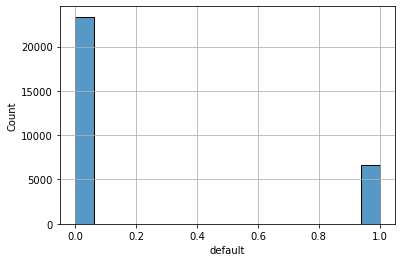

In [143]:
# смотрю на распределение целевой переменной
sns.histplot(data=df['default'])
plt.grid()
plt.show()

# присутствует дисбаланс классов, что придется учитывать в длаьнейшем при обучении модели

In [144]:
# далее смотрю распределения основных параметров относительно целевой переменной

## AGE

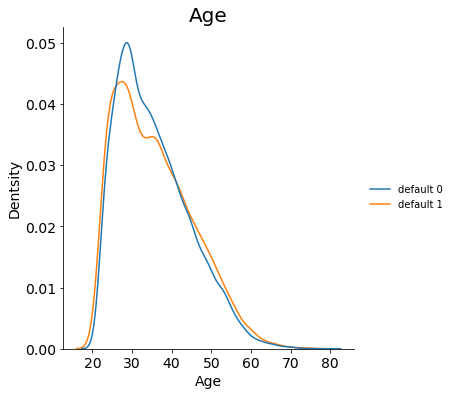

In [145]:
sns.displot(
    {
        "default 0": df[df.default == 0].AGE,
        "default 1": df[df.default == 1].AGE
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## SEX

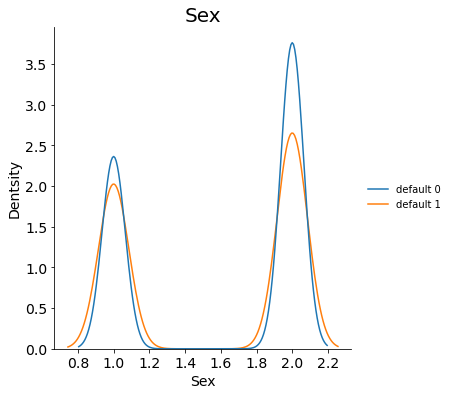

In [146]:
sns.displot(
    {
        "default 0": df[df.default == 0].SEX,
        "default 1": df[df.default == 1].SEX
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Sex', fontsize=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## MARRIAGE

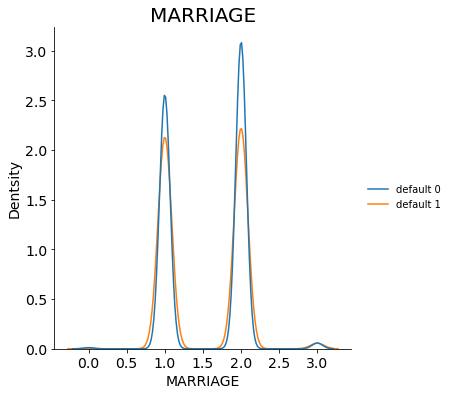

In [147]:
sns.displot(
    {
        "default 0": df[df.default == 0].MARRIAGE,
        "default 1": df[df.default == 1].MARRIAGE
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('MARRIAGE', fontsize=20)
plt.xlabel('MARRIAGE', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## AGE-EDUCATION

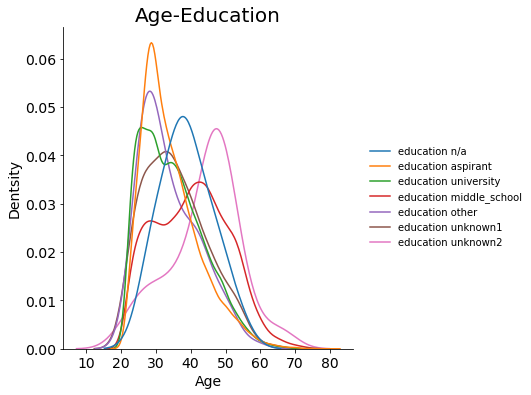

In [148]:
sns.displot(
    {
        "education n/a": df[df.EDUCATION == 0].AGE,
        "education aspirant": df[df.EDUCATION == 1].AGE,
        "education university": df[df.EDUCATION == 2].AGE,
        "education middle_school": df[df.EDUCATION == 3].AGE,
        "education other": df[df.EDUCATION == 4].AGE,
        "education unknown1": df[df.EDUCATION == 5].AGE,
        "education unknown2": df[df.EDUCATION == 6].AGE,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [149]:
df.groupby('EDUCATION')['AGE'].median()


EDUCATION
0    38.5
1    32.0
2    33.0
3    40.0
4    32.0
5    34.0
6    46.0
Name: AGE, dtype: float64

In [150]:
df.groupby('SEX')['AGE'].median()

SEX
1    35.0
2    33.0
Name: AGE, dtype: float64

In [151]:
df.groupby('MARRIAGE')['AGE'].median()

MARRIAGE
0    37.0
1    39.0
2    29.0
3    43.0
Name: AGE, dtype: float64

<AxesSubplot:>

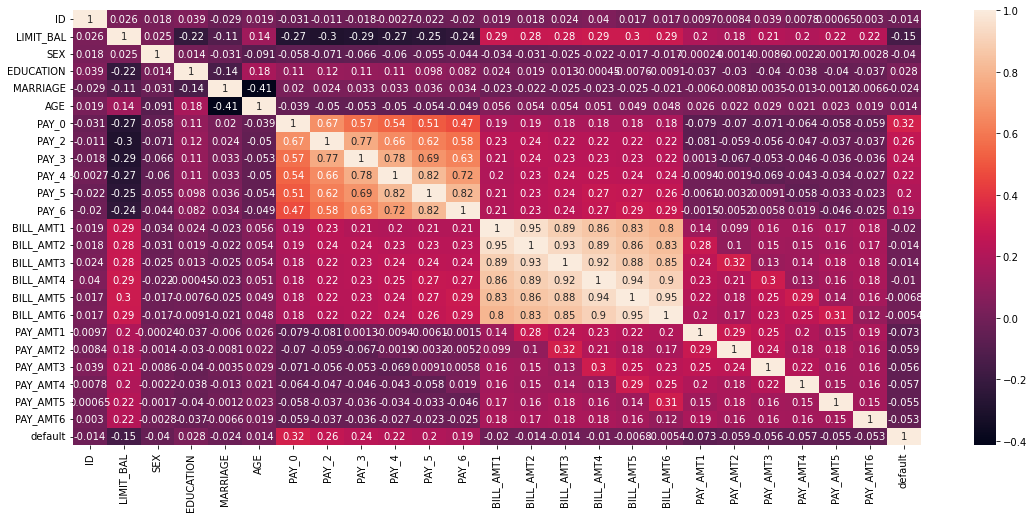

In [152]:
# смотрю наличие корреляционных зависимостей
plt.figure(figsize = (19,8))
sns.heatmap(df.corr(), annot=True)

В целом, распределения основных параметров хоть и имеют не идеальные нормальные распределения, но с такими данными можно работать и попробовать создать модель без предварительного feature инжениринга.


Вообще, названия переменных PAY_2 или BILL_AMT1 не совсем удачны, и лучше отображать их как название месяца. Либо надо быть уверенным, что при подаче на вход данных будет сохранена преемственность цифрового обозначения и месяца.

# Modeling

In [120]:
# так как все категориальные колонки уже находятся в готовом виде, использование метода get_dummies не требуется

In [153]:
# удаляю ID пользователя, так как оно не влияет итог дефолта
df.drop('ID', axis=1, inplace=True)

In [154]:
# выделяю целевую переменную и разбиваю данные для тесте и обучения.
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=13)

# так как был дизбаланс класса, ставлю stratify=y

In [161]:
#строю baseline модель
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [162]:


print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))



roc-auc: 0.6340751460513837
precision: 0.3154911838790932
recall: 0.3775433308214017
f1: 0.3437392795883362
logloss: 11.012258067645126


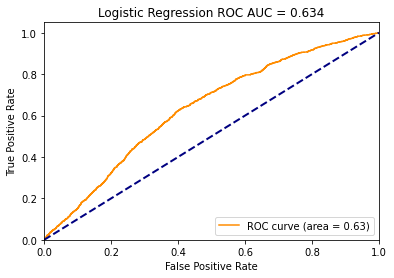

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()





## Подбор параметров

In [132]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression()
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)



In [112]:
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, pe

[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=sag; total time=   2.5s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.4s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] EN

[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.2s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.5s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.6s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=   4.2s
[CV] END C=1.0, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; tot

[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.4s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.4s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   1.9s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=1.0, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   3.1s
[CV] END C=1.0, l1_ra

[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.3s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.25, max_iter=200, penalty=e

[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.5, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=250.75, 

[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=250.75, l1_ratio=0.75, max_iter=100, penalty=l2, solver=saga; total t

[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   3.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=250.75, l1_ratio=0.75, max_iter=400, penalty=elasticnet, solve

[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.3s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.4s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.5s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.25, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_rati

[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   2.2s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=500.5, l1_ratio=0.5, max_iter=300, penalty=l1, solver=lbf

[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.2s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.1s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=saga; total time=   2.2s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.4s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=500.5, l1_ratio=0.75, max_iter=200, penalty=l2, solver=saga; total time=   1.6s

[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=100, penalty=elasticne

[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=   4.6s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=   4.5s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=saga; total time=   4.4s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.25, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.

[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=saga; total time=   3.3s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=   4.6s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=   4.4s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1, solver=saga; total time=   4.5s
[CV] END C=750.25, l1_ratio=0.5, max_iter=400, penalty=l1,

[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.3s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=saga; total time=   3.4s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   1.9s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   1.9s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=sag; total time=   1.8s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total time=   2.6s
[CV] END C=750.25, l1_ratio=0.75, max_iter=300, penalty=l2, solver=saga; total t

[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.25, max_iter=200, penalty=elasticnet, solve

[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=saga; total time=   1.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_rat

[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=saga; total time=   4.5s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=100, pena

[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   4.3s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   4.3s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=saga; total time=   4.3s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.5s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.3s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=sag; total time=   2.3s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total time=   3.4s
[CV] END C=1000.0, l1_ratio=0.75, max_iter=400, penalty=l2, solver=saga; total t

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

In [113]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.6567063172380446
{'C': 500.5, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [158]:
#{'C': 500.5, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
best_params = {'C': 500.5, 
               'l1_ratio': 0.25,
               'max_iter': 100, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [159]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [160]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.6340772424634389
precision: 0.31529263687854
recall: 0.3775433308214017
f1: 0.3436213991769548
logloss: 11.018014663643848


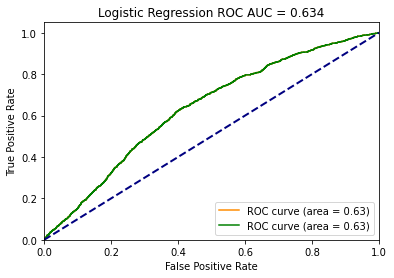

In [165]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()



В целом, подбор параметров не сильно улучшил модель.
Возможно другая модель, показала бы лучшие результаты, например случайный лес с применением бустинга, но это отдельный проект, который требует глубоко погружения.

Также остался открыт вопрос мультиколлинеарности некоторых параметров, которые можно было бы фильтровать по уровню корреляционной зависимости.
